In [1]:
import pandas as pd
import numpy as np
import pickle as pk

In [2]:
import joblib as jb

In [3]:
df = pd.read_csv("climate-ds.csv")

In [4]:
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['Unnamed: 8'])

In [5]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
hg/ha_yield                      0
dtype: int64

In [6]:
max(df['average_rain_fall_mm_per_year'])

3240

In [7]:
df = df.sample(frac=0.5, random_state=42)

In [8]:
df

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
25564,Spain,"Rice, paddy",2008,636,40719.00,17.21,69220
18113,Madagascar,Wheat,1996,1513,152.01,19.71,20000
25607,Spain,Sorghum,2010,636,39043.00,16.51,51206
6815,Colombia,Potatoes,2007,3240,82439.06,27.45,166986
18144,Madagascar,Sweet potatoes,2000,1513,130.46,19.65,56319
...,...,...,...,...,...,...,...
26940,Turkey,Maize,2007,593,48715.51,19.82,68381
21149,Nepal,Soybeans,2013,1500,454.53,15.79,11719
27766,Uruguay,Soybeans,1997,1300,3362.05,17.46,17333
1992,Bahamas,Cassava,1994,1292,484.59,25.73,80000


In [9]:
df['Area'].unique()

array(['Spain', 'Madagascar', 'Colombia', 'India', 'Brazil', 'Pakistan',
       'Morocco', 'Papua New Guinea', 'Ecuador', 'Burundi', 'Zimbabwe',
       'Nicaragua', 'Rwanda', 'Angola', 'Mexico', 'Argentina', 'Turkey',
       'Libya', 'Malawi', 'Ireland', 'Haiti', 'Mauritania', 'Finland',
       'Australia', 'Canada', 'Portugal', 'Honduras', 'Kenya', 'Ukraine',
       'Peru', 'Hungary', 'Kazakhstan', 'Zambia', 'Japan', 'Slovenia',
       'Nepal', 'Cameroon', 'South Africa', 'Sri Lanka', 'United Kingdom',
       'Uganda', 'Indonesia', 'Guinea', 'Lithuania', 'Senegal', 'Egypt',
       'Mali', 'Saudi Arabia', 'New Zealand', 'Italy', 'Namibia',
       'Tajikistan', 'Lebanon', 'Latvia', 'Guatemala', 'Netherlands',
       'Dominican Republic', 'Suriname', 'Niger', 'Albania',
       'El Salvador', 'Germany', 'Bangladesh', 'Uruguay', 'Burkina Faso',
       'Poland', 'Central African Republic', 'Bulgaria', 'Chile',
       'Croatia', 'Iraq', 'Belarus', 'Thailand', 'Mozambique', 'Jamaica',
       

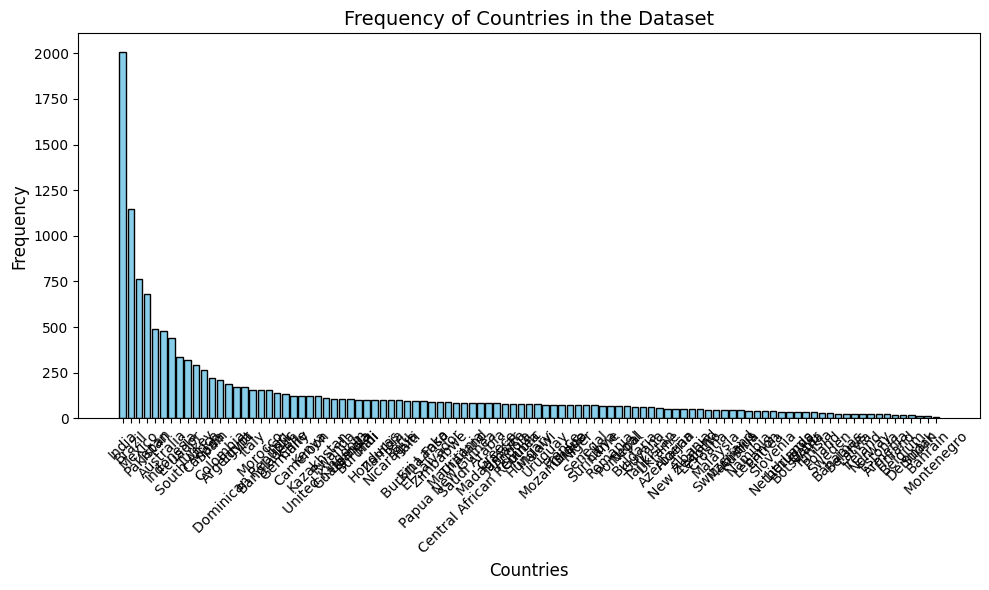

In [10]:
import matplotlib.pyplot as plt

country_counts = df['Area'].value_counts()

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(country_counts.index, country_counts.values, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency of Countries in the Dataset', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()

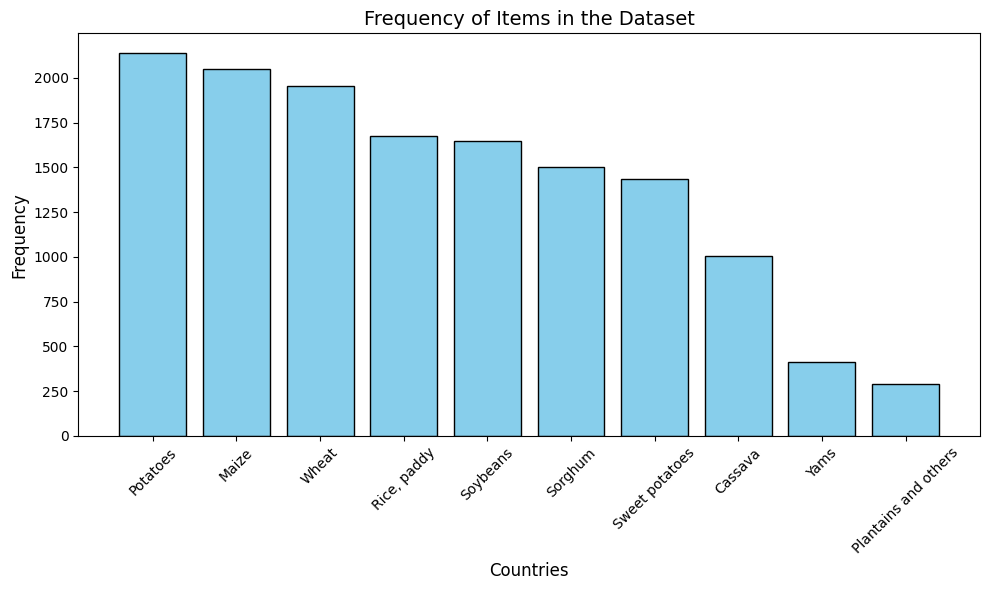

In [11]:
country_counts = df['Item'].value_counts()

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(country_counts.index, country_counts.values, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency of Items in the Dataset', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()

In [12]:
from scipy.stats import zscore

# Calculate the Z-Score for 'avg_temperature'
z_scores = zscore(df['avg_temp'])

# Identify outliers (z-score > 3 or < -3)
outliers = df[abs(z_scores) > 3]

# Show the outliers in avg_temperature
print(outliers[['avg_temp']])

       avg_temp
17202      1.61
17198      1.61
21694      1.30
17206      1.61
17166      1.63
17168      1.63
17204      1.61
17172      1.63


In [13]:
# Calculate the IQR for 'avg_temptature'
Q1 = df['avg_temp'].quantile(0.25)
Q3 = df['avg_temp'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers (values outside the bounds)
outliers = df[(df['avg_temp'] < lower_bound) | (df['avg_temp'] > upper_bound)]

# Show the outliers in avg_temperature
print(outliers[['avg_temp']])


       avg_temp
17156      2.78
17378      2.50
17354      2.95
21662      2.72
17202      1.61
17366      2.67
21678      2.68
17198      1.61
21694      1.30
17206      1.61
17384      2.50
21665      2.74
17166      1.63
17382      2.50
17168      1.63
17204      1.61
17386      2.50
21669      1.88
17172      1.63
17388      2.50
17362      2.95
21668      1.88


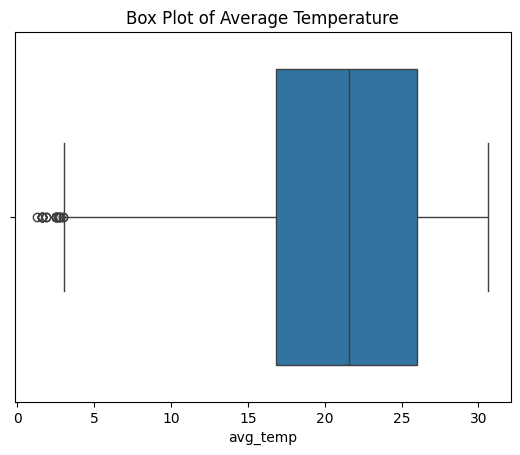

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for avg_temptature to visualize outliers
sns.boxplot(x=df['avg_temp'])
plt.title('Box Plot of Average Temperature')
plt.show()

In [15]:
Q1 = df['avg_temp'].quantile(0.25)
Q3 = df['avg_temp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the rows to keep only those within the bounds
# df = df[(df['avg_temp'] >= lower_bound) & (df['avg_temp'] <= upper_bound)]
# df

In [16]:
df[df['Area']=='Albania']

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
96,Albania,Potatoes,2013,1485,982.32,17.41,260110
46,Albania,Wheat,1999,1485,502.86,16.57,24954
6,Albania,Maize,1991,1485,121.00,15.36,29068
52,Albania,Potatoes,2001,1485,628.79,16.59,148818
34,Albania,Wheat,1996,1485,313.96,15.64,21741
35,Albania,Maize,1997,1485,376.93,15.90,31862
75,Albania,Maize,2008,1485,1069.54,16.71,50000
91,Albania,Maize,2012,1485,766.25,16.70,67290
17,Albania,Wheat,1992,1485,121.00,16.06,24388
29,Albania,Soybeans,1995,1485,251.00,15.67,11791


In [17]:
import pandas as pd

# Perform One-Hot Encoding on 'Area' and 'Item'
df_encoded = pd.get_dummies(df, columns=['Area', 'Item'])

# Display the first few rows of the updated DataFrame
print(df_encoded)

       Year  average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  \
25564  2008                            636           40719.00     17.21   
18113  1996                           1513             152.01     19.71   
25607  2010                            636           39043.00     16.51   
6815   2007                           3240           82439.06     27.45   
18144  2000                           1513             130.46     19.65   
...     ...                            ...                ...       ...   
26940  2007                            593           48715.51     19.82   
21149  2013                           1500             454.53     15.79   
27766  1997                           1300            3362.05     17.46   
1992   1994                           1292             484.59     25.73   
25026  2007                            495           26857.00     15.90   

       hg/ha_yield  Area_Albania  Area_Algeria  Area_Angola  Area_Argentina  \
25564        69220  

In [18]:
df_cleaned = df.drop(columns=['Area', 'Item'])

# Perform One-Hot Encoding on 'Area' and 'Item', and drop the first category to avoid multicollinearity
df_encoded = pd.get_dummies(df, columns=['Area', 'Item'])

# Concatenate the original DataFrame (without 'Area' and 'Item') with the encoded DataFrame
df_final = pd.concat([df_cleaned, df_encoded], axis=1)

# Display the first few rows of the final DataFrame
print(df_final.head())

       Year  average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  \
25564  2008                            636           40719.00     17.21   
18113  1996                           1513             152.01     19.71   
25607  2010                            636           39043.00     16.51   
6815   2007                           3240           82439.06     27.45   
18144  2000                           1513             130.46     19.65   

       hg/ha_yield  Year  average_rain_fall_mm_per_year  pesticides_tonnes  \
25564        69220  2008                            636           40719.00   
18113        20000  1996                           1513             152.01   
25607        51206  2010                            636           39043.00   
6815        166986  2007                           3240           82439.06   
18144        56319  2000                           1513             130.46   

       avg_temp  hg/ha_yield  ...  Item_Cassava  Item_Maize  \
25564     17.21  

In [19]:
print(df_final.columns.tolist())

['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'hg/ha_yield', 'Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'hg/ha_yield', 'Area_Albania', 'Area_Algeria', 'Area_Angola', 'Area_Argentina', 'Area_Armenia', 'Area_Australia', 'Area_Austria', 'Area_Azerbaijan', 'Area_Bahamas', 'Area_Bahrain', 'Area_Bangladesh', 'Area_Belarus', 'Area_Belgium', 'Area_Botswana', 'Area_Brazil', 'Area_Bulgaria', 'Area_Burkina Faso', 'Area_Burundi', 'Area_Cameroon', 'Area_Canada', 'Area_Central African Republic', 'Area_Chile', 'Area_Colombia', 'Area_Croatia', 'Area_Denmark', 'Area_Dominican Republic', 'Area_Ecuador', 'Area_Egypt', 'Area_El Salvador', 'Area_Eritrea', 'Area_Estonia', 'Area_Finland', 'Area_France', 'Area_Germany', 'Area_Ghana', 'Area_Greece', 'Area_Guatemala', 'Area_Guinea', 'Area_Guyana', 'Area_Haiti', 'Area_Honduras', 'Area_Hungary', 'Area_India', 'Area_Indonesia', 'Area_Iraq', 'Area_Ireland', 'Area_Italy', 'Area_Jamaica', 'Area_Japan', 'Area

In [20]:
df_final = df_final.loc[:, ~df_final.columns.duplicated()]

In [21]:
print(df_final.columns.tolist())

['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'hg/ha_yield', 'Area_Albania', 'Area_Algeria', 'Area_Angola', 'Area_Argentina', 'Area_Armenia', 'Area_Australia', 'Area_Austria', 'Area_Azerbaijan', 'Area_Bahamas', 'Area_Bahrain', 'Area_Bangladesh', 'Area_Belarus', 'Area_Belgium', 'Area_Botswana', 'Area_Brazil', 'Area_Bulgaria', 'Area_Burkina Faso', 'Area_Burundi', 'Area_Cameroon', 'Area_Canada', 'Area_Central African Republic', 'Area_Chile', 'Area_Colombia', 'Area_Croatia', 'Area_Denmark', 'Area_Dominican Republic', 'Area_Ecuador', 'Area_Egypt', 'Area_El Salvador', 'Area_Eritrea', 'Area_Estonia', 'Area_Finland', 'Area_France', 'Area_Germany', 'Area_Ghana', 'Area_Greece', 'Area_Guatemala', 'Area_Guinea', 'Area_Guyana', 'Area_Haiti', 'Area_Honduras', 'Area_Hungary', 'Area_India', 'Area_Indonesia', 'Area_Iraq', 'Area_Ireland', 'Area_Italy', 'Area_Jamaica', 'Area_Japan', 'Area_Kazakhstan', 'Area_Kenya', 'Area_Latvia', 'Area_Lebanon', 'Area_Lesotho', 'Area_Libya', 

In [22]:
max(df['pesticides_tonnes'])

367778.0

In [23]:
correlation_matrix = df_final.corr()
print(correlation_matrix)

                                   Year  average_rain_fall_mm_per_year  \
Year                           1.000000                      -0.009167   
average_rain_fall_mm_per_year -0.009167                       1.000000   
pesticides_tonnes              0.138625                       0.169562   
avg_temp                       0.006959                       0.313324   
hg/ha_yield                    0.088945                      -0.006170   
...                                 ...                            ...   
Item_Sorghum                  -0.002964                      -0.064337   
Item_Soybeans                 -0.008323                      -0.020355   
Item_Sweet potatoes           -0.003448                       0.045150   
Item_Wheat                    -0.006097                      -0.101937   
Item_Yams                     -0.005130                       0.119338   

                               pesticides_tonnes  avg_temp  hg/ha_yield  \
Year                                

In [24]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.show()

In [25]:
df_final.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
25564,2008,636,40719.00,17.21,69220,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
18113,1996,1513,152.01,19.71,20000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
25607,2010,636,39043.00,16.51,51206,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
6815,2007,3240,82439.06,27.45,166986,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
18144,2000,1513,130.46,19.65,56319,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [26]:
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Select the columns to scale
# columns_to_scale = ['pesticides_tonnes']

# Initialize the StandardScaler
# scaler = StandardScaler()

# Step 2: Scale the selected columns
# df_final[columns_to_scale] = scaler.fit_transform(df_final[columns_to_scale])

# Step 3: Split the data into features (X) and target (y)
X = df_final.drop(columns=['hg/ha_yield'])  # Features
y = df_final['hg/ha_yield']  # Target variable

# Step 4: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict on the test set
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print(f"R²: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


R²: 0.7523285920337487
Mean Absolute Error (MAE): 28666.55670462279
Mean Squared Error (MSE): 1665425247.4723182
Root Mean Squared Error (RMSE): 40809.62199619495


In [137]:
with open('linear_regression_model.pkl', 'wb') as model_file1:
    jb.dump(model, model_file1)

In [286]:
# with open('scaler.pkl', 'wb') as scaler_file:
#     pk.dump(scaler, scaler_file)

In [26]:
y_pred

array([ 84092.27400303, -29580.97573423,  66498.52567029, ...,
       161811.34606099,  86294.03529525,  17937.59735513])

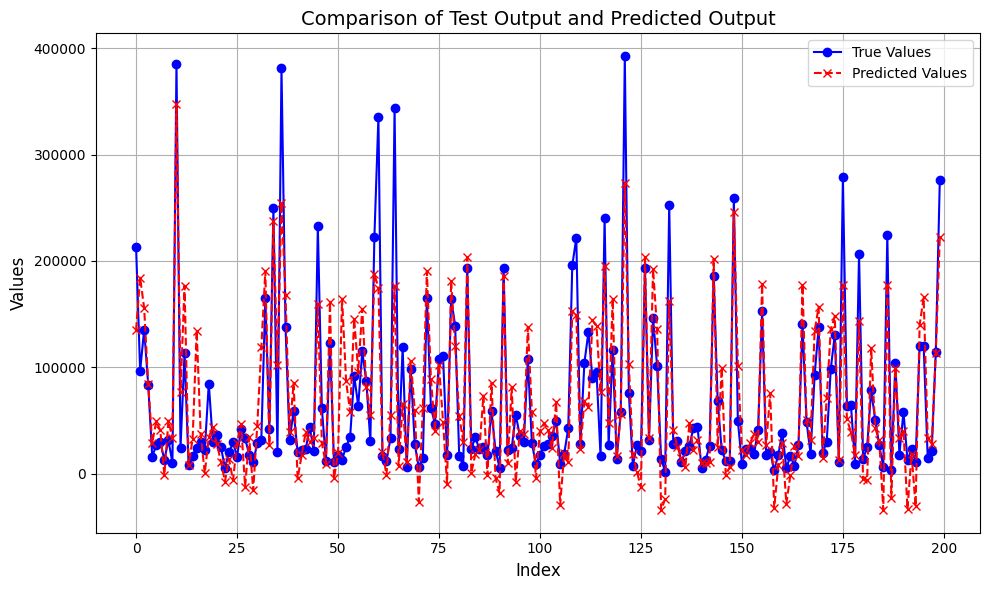

In [27]:
import matplotlib.pyplot as plt
mk=[]
for i in y_test:
    mk.append(i)
# Example data
test_output = mk[:200] # True values
predicted_output = y_pred[:200]  # Predicted values

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(test_output, label='True Values', marker='o', linestyle='-', color='blue')  # True values
plt.plot(predicted_output, label='Predicted Values', marker='x', linestyle='--', color='red')  # Predicted values

# Add labels and title
plt.xlabel('Index', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Comparison of Test Output and Predicted Output', fontsize=14)
plt.legend()  # Add a legend
plt.grid(True)  # Add a grid
plt.tight_layout()

# Display the graph
plt.show()


In [28]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = rf_model.predict(X_test)

# Step 5: Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print(f"R²: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R²: 0.978852169815357
Mean Absolute Error (MAE): 5197.369766371681
Mean Squared Error (MSE): 142205071.66318062
Root Mean Squared Error (RMSE): 11924.976799272215


In [29]:
with open('random_regression_model.pkl', 'wb') as model_file:
    jb.dump(rf_model, model_file)

In [30]:
list(df_final.columns)

['Year',
 'average_rain_fall_mm_per_year',
 'pesticides_tonnes',
 'avg_temp',
 'hg/ha_yield',
 'Area_Albania',
 'Area_Algeria',
 'Area_Angola',
 'Area_Argentina',
 'Area_Armenia',
 'Area_Australia',
 'Area_Austria',
 'Area_Azerbaijan',
 'Area_Bahamas',
 'Area_Bahrain',
 'Area_Bangladesh',
 'Area_Belarus',
 'Area_Belgium',
 'Area_Botswana',
 'Area_Brazil',
 'Area_Bulgaria',
 'Area_Burkina Faso',
 'Area_Burundi',
 'Area_Cameroon',
 'Area_Canada',
 'Area_Central African Republic',
 'Area_Chile',
 'Area_Colombia',
 'Area_Croatia',
 'Area_Denmark',
 'Area_Dominican Republic',
 'Area_Ecuador',
 'Area_Egypt',
 'Area_El Salvador',
 'Area_Eritrea',
 'Area_Estonia',
 'Area_Finland',
 'Area_France',
 'Area_Germany',
 'Area_Ghana',
 'Area_Greece',
 'Area_Guatemala',
 'Area_Guinea',
 'Area_Guyana',
 'Area_Haiti',
 'Area_Honduras',
 'Area_Hungary',
 'Area_India',
 'Area_Indonesia',
 'Area_Iraq',
 'Area_Ireland',
 'Area_Italy',
 'Area_Jamaica',
 'Area_Japan',
 'Area_Kazakhstan',
 'Area_Kenya',
 'Area

In [214]:
##2
def predict_yield_dynamic(area, item, year, avg_rainfall, pesticides, avg_temp, rf_model, encoder_columns):
    # Create a DataFrame for the input
    input_data = {
        "Year": [year],
        "average_rain_fall_mm_per_year": [avg_rainfall],
        "pesticides_tonnes": [pesticides],
        "avg_temp": [avg_temp]
    }

    # Convert to DataFrame
    df_input = pd.DataFrame(input_data)

    # Create a DataFrame for the one-hot encoded columns (initialized to 0)
    encoded_data = {col: [0] for col in encoder_columns if col not in df_input.columns}
    
    # Add the area and item columns to the encoded data
    area_col = f"Area_{area}"
    item_col = f"Item_{item}"
    if area_col in encoder_columns:
        encoded_data[area_col] = [1]
    else:
        print(f"Warning: Area '{area}' not found in training data. Prediction may be less accurate.")
    
    if item_col in encoder_columns:
        encoded_data[item_col] = [1]
    else:
        print(f"Warning: Item '{item}' not found in training data. Prediction may be less accurate.")
    
    # Convert to DataFrame
    df_encoded = pd.DataFrame(encoded_data)
    
    # Concatenate the original input DataFrame with the encoded DataFrame
    df_input = pd.concat([df_input, df_encoded], axis=1)

    # Reindex to match the training data columns (excluding the target column 'hg/ha_yield')
    df_input = df_input.reindex(columns=encoder_columns, fill_value=0)

    # Predict using the trained model
    prediction = rf_model.predict(df_input)
    return prediction[0]

# Example usage
# Assuming `rf_model` is already trained and `encoder_columns` does not include the target column
encoder_columns = [col for col in df_final.columns if col != 'hg/ha_yield']  # Exclude target column
result = predict_yield_dynamic(
    area="India", item="Maize", year=2025, avg_rainfall=1200, pesticides=20, avg_temp=28,
    rf_model=rf_model, encoder_columns=encoder_columns
)
print(f"Predicted Yield: {result:.2f} hg/ha")

Predicted Yield: 10603.46 hg/ha


In [215]:
result = predict_yield_dynamic(
    area="Zimbabwe", item="Soybeans", year=2013, avg_rainfall=657, pesticides=2550, avg_temp=19.76,
    rf_model=rf_model, encoder_columns=encoder_columns
)
print(f"Predicted Yield: {result} hg/ha")

Predicted Yield: 15168.83 hg/ha


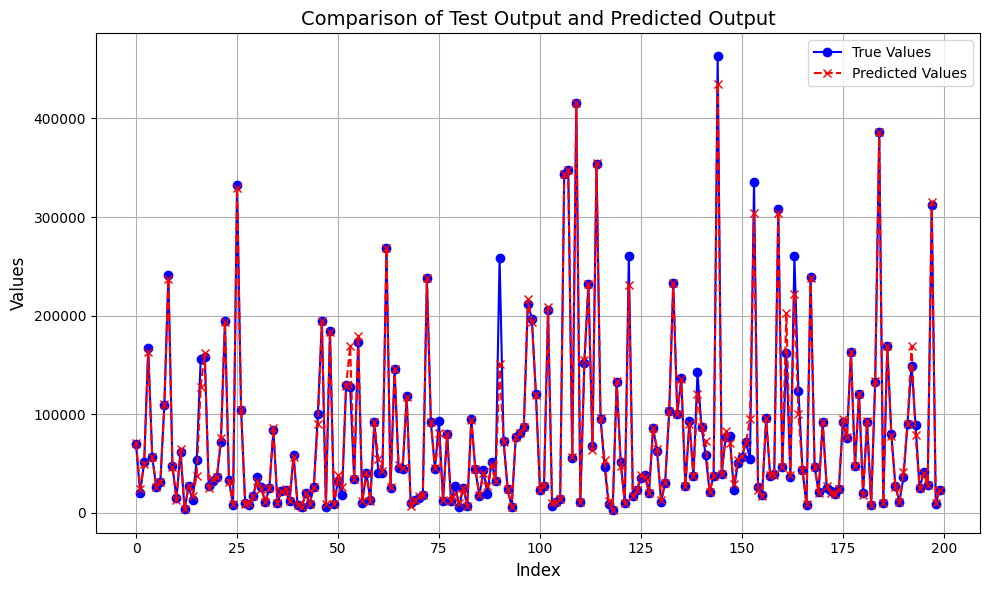

In [216]:
import matplotlib.pyplot as plt
mk=[]
for i in y_test:
    mk.append(i)
# Example data
test_output = mk[:200] # True values
predicted_output = y_pred[:200]  # Predicted values

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(test_output, label='True Values', marker='o', linestyle='-', color='blue')  # True values
plt.plot(predicted_output, label='Predicted Values', marker='x', linestyle='--', color='red')  # Predicted values

# Add labels and title
plt.xlabel('Index', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Comparison of Test Output and Predicted Output', fontsize=14)
plt.legend()  # Add a legend
plt.grid(True)  # Add a grid
plt.tight_layout()

# Display the graph
plt.show()


In [217]:
y_test

25564     69220
18113     20000
25607     51206
6815     166986
18144     56319
          ...  
25027     30142
5508     140000
11393    252775
16688     24615
3877      23187
Name: hg/ha_yield, Length: 5649, dtype: int64

In [218]:
y_pred

array([ 70735.96,  24168.87,  48994.27, ..., 252700.02,  24799.78,
        23060.63])

In [ ]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')  # 'rbf' kernel is commonly used for non-linear problems
svr_model.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = svr_model.predict(X_test)

# Step 5: Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print(f"R²: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

In [141]:
with open('svm_regression_model.pkl', 'wb') as model_file:
    jb.dump(svr_model, model_file)

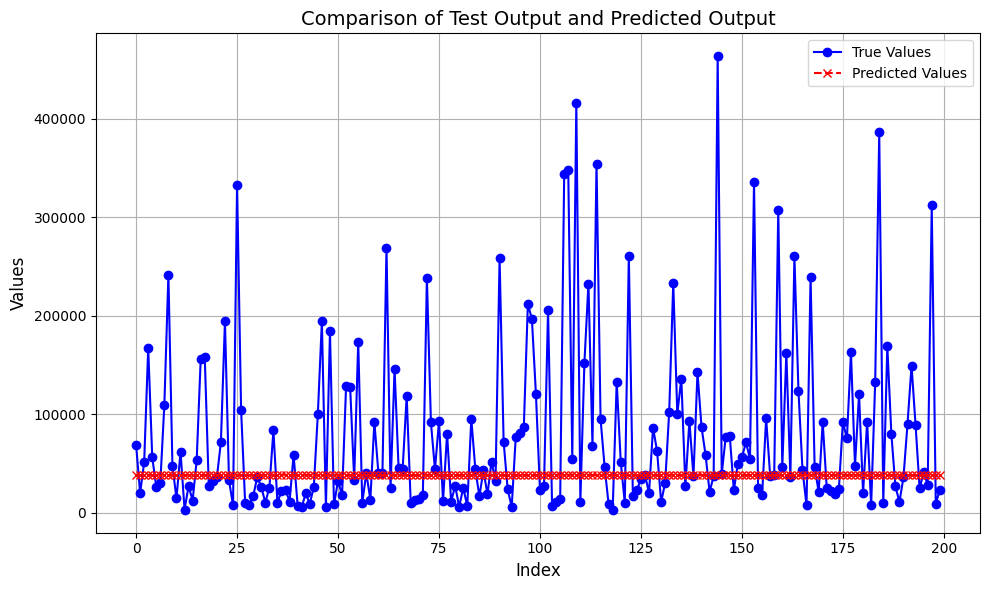

In [221]:
import matplotlib.pyplot as plt
mk=[]
for i in y_test:
    mk.append(i)
# Example data
test_output = mk[:200] # True values
predicted_output = y_pred[:200]  # Predicted values

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(test_output, label='True Values', marker='o', linestyle='-', color='blue')  # True values
plt.plot(predicted_output, label='Predicted Values', marker='x', linestyle='--', color='red')  # Predicted values

# Add labels and title
plt.xlabel('Index', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Comparison of Test Output and Predicted Output', fontsize=14)
plt.legend()  # Add a legend
plt.grid(True)  # Add a grid
plt.tight_layout()

# Display the graph
plt.show()


In [142]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R²: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


R²: 0.8732412962861581
Mean Absolute Error (MAE): 19396.27859793783
Mean Squared Error (MSE): 919466056.1923125
Root Mean Squared Error (RMSE): 30322.698695734725


In [144]:
with open('gradient_regression_model.pkl', 'wb') as model_file:
    jb.dump(gb_model, model_file)

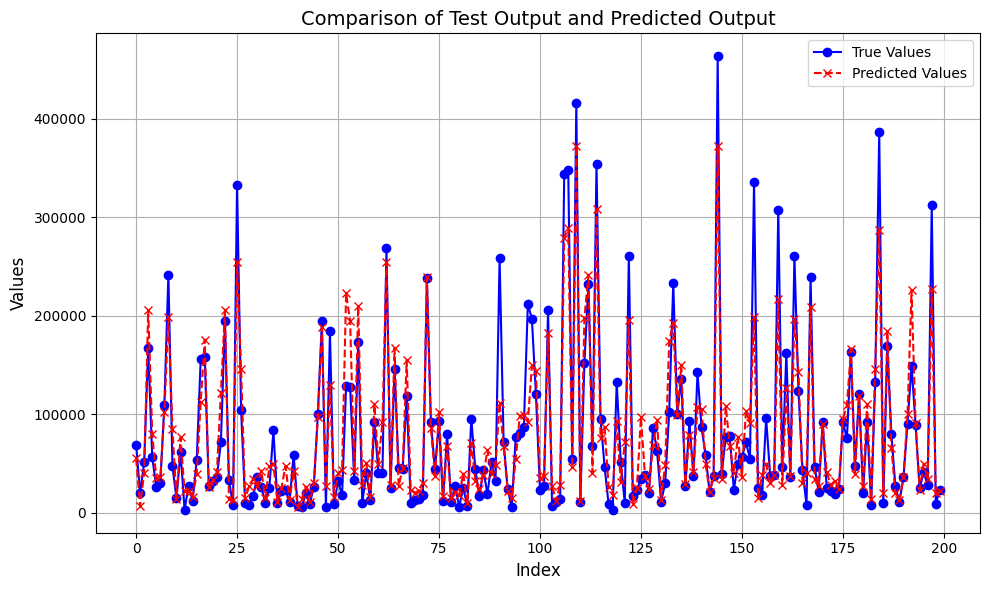

In [30]:
import matplotlib.pyplot as plt
mk=[]
for i in y_test:
    mk.append(i)
# Example data
test_output = mk[:200] # True values
predicted_output = y_pred[:200]  # Predicted values

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(test_output, label='True Values', marker='o', linestyle='-', color='blue')  # True values
plt.plot(predicted_output, label='Predicted Values', marker='x', linestyle='--', color='red')  # Predicted values

# Add labels and title
plt.xlabel('Index', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Comparison of Test Output and Predicted Output', fontsize=14)
plt.legend()  # Add a legend
plt.grid(True)  # Add a grid
plt.tight_layout()

# Display the graph
plt.show()
